In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import pi
import math 

fifa = pd.read_csv('FIFA Player Info.csv', keep_default_na = False)
fifa = fifa.drop(columns='Unnamed: 0')
data = fifa[['Name','Pace', 'Shooting','Passing', 'Dribbling', 'Defending', 'Physicality']]
HeatmapData = data.groupby('Name').mean()
labels = np.array(HeatmapData.columns.values)
N = len(labels)

angles2 = []
for i in range(N):
    ang = 90 + i*180/np.pi
    if ang > 360:
        ang = abs(360 - ang)
    angles2.append(ang)
angles2.sort()
angles = [ math.radians(i) for i in angles2]

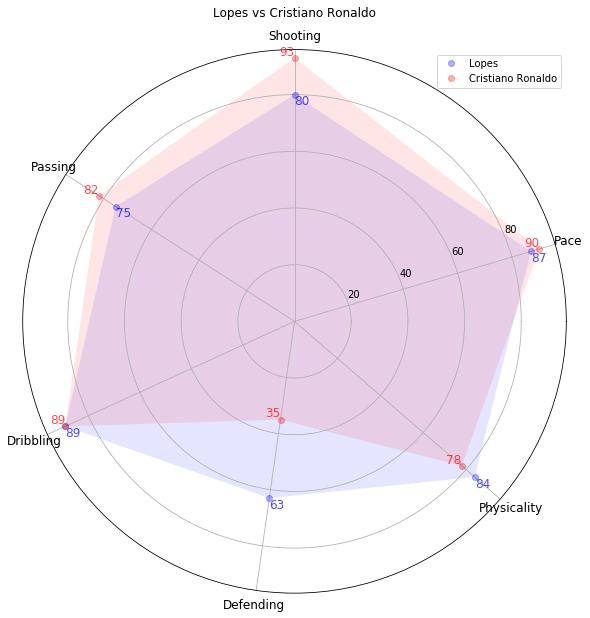

In [24]:
name = fifa.Name.tolist()[100]
name2 = fifa.Name.tolist()[1]
stats=HeatmapData.loc[name, labels]
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'bo', linewidth=1,alpha=0.3)
ax.fill(angles, stats, 'b', alpha=0.1)
stats2=HeatmapData.loc[name2,labels]
ax.plot(angles, stats2, 'ro', linewidth=1,alpha=0.3)
ax.fill(angles, stats2, 'r', alpha=0.1)
ax.set_thetagrids(angles2, labels, fontsize=12)
ax.set_title(name + " vs " + name2)
ax.set_label('Label via method')
for i in range(N):
    ax.text(angles[i], stats[i], str(int(stats[i])),color='blue', alpha=0.7,fontsize=12,verticalalignment='top', horizontalalignment='left',)
    ax.text(angles[i], stats2[i], str(int(stats2[i])),color='red', alpha=0.7,fontsize=12,verticalalignment='bottom', horizontalalignment='right')
ax.legend([name, name2], loc=1)
ax.grid(True)
  